### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Loading Dataset of Netflix

In [3]:
# Load data from CSV file
file_path = r"C:\Users\gmash\Desktop\Jupyter\NFLX.csv"
data = pd.read_csv(file_path)

In [4]:
# Ensure 'Date' is in datetime format and sort by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Excluding Null Values

In [5]:
# Check for missing values and fill them
data.fillna(method='ffill', inplace=True)

C:\Users\gmash\AppData\Local\Temp\ipykernel_9620\1481106443.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


# Data Representation (Tabular Form)

In [6]:
# Visualize the first few rows of the data
print("First few rows of the data:\n", data.head())

First few rows of the data:
         Date        Open        High         Low       Close   Adj Close  \
0 2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1 2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2 2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3 2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4 2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  


In [7]:
# Check for outliers based on 'Close' price
Q1 = data['Close'].quantile(0.25)
Q3 = data['Close'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = data[(data['Close'] >= (Q1 - 1.5 * IQR)) & (data['Close'] <= (Q3 + 1.5 * IQR))]

In [8]:
# Extract 'Date' and 'Close' price columns for prediction
stock_data = filtered_data[['Date', 'Close']]

# Data Visualization (Stock Price History)

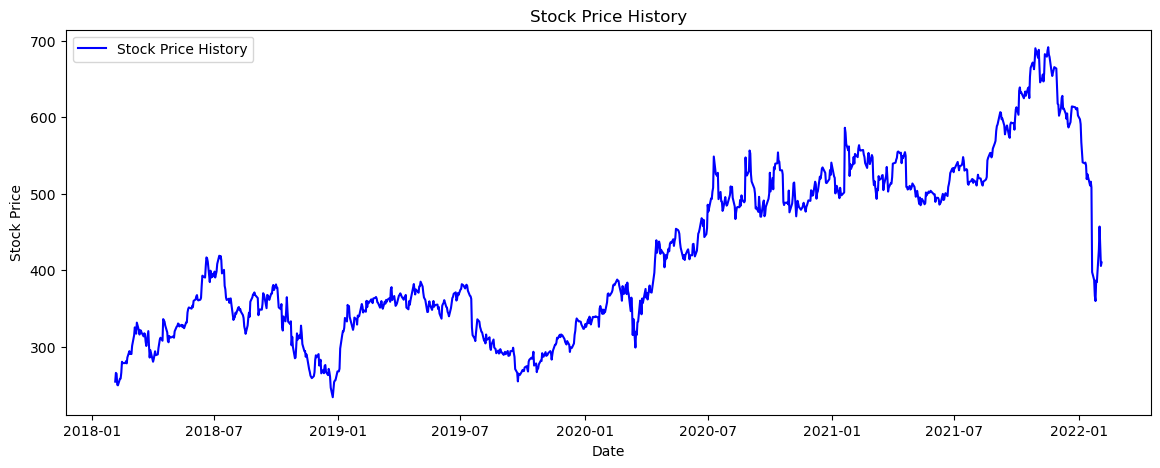

In [9]:
# Visualize the 'Close' price data
plt.figure(figsize=(14, 5))
plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price History', color='blue')
plt.title('Stock Price History')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [10]:
# Normalize the data (scale the 'Close' price)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))

In [11]:
# Prepare dataset for model by creating features (look-back window of 60 days)
def create_features(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step, 0])  # Features
        y.append(data[i+time_step, 0])  # Target (next day's price)
    return np.array(X), np.array(y)

# Linear Regression

In [12]:
X, y = create_features(scaled_data, time_step=60)

# Split the dataset into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [13]:
# Train RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# Predictions using RandomForest
rf_predictions = rf_model.predict(X_test)

In [15]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

# Linear Regression Prediction Model

In [16]:
# Predictions using Linear Regression
lr_predictions = lr_model.predict(X_test)

In [17]:
# Inverse scaling to get actual price predictions
rf_predictions_actual = scaler.inverse_transform(rf_predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
lr_predictions_actual = scaler.inverse_transform(lr_predictions.reshape(-1, 1))

In [18]:
# Evaluate the models using RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test_actual, rf_predictions_actual))
lr_rmse = np.sqrt(mean_squared_error(y_test_actual, lr_predictions_actual))

# Results of Linear Regression

In [19]:
print(f'Random Forest RMSE: {rf_rmse}')
print(f'Linear Regression RMSE: {lr_rmse}')

Random Forest RMSE: 59.720251459737945
Linear Regression RMSE: 13.716819111622584


# Data Visualization Comparison

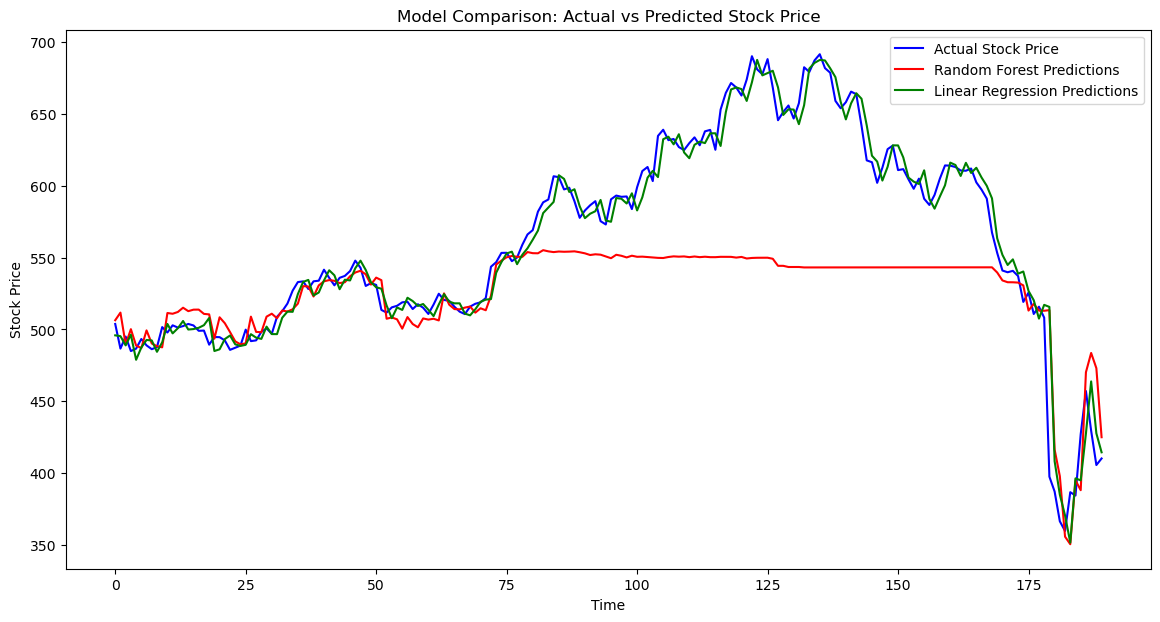

In [20]:
# Visualize Actual vs Predicted Stock Prices for both models
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, label='Actual Stock Price', color='blue')
plt.plot(rf_predictions_actual, label='Random Forest Predictions', color='red')
plt.plot(lr_predictions_actual, label='Linear Regression Predictions', color='green')
plt.title('Model Comparison: Actual vs Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [21]:
# Analyze Linear Regression coefficients
coefficients = lr_model.coef_
intercept = lr_model.intercept_
print("Linear Regression Coefficients:", coefficients)
print("Intercept:", intercept)

Linear Regression Coefficients: [ 0.01570051  0.00488458 -0.03309497  0.00775701 -0.03150297  0.02229471
  0.04485605  0.00885638 -0.08814528 -0.05348769  0.08515112  0.11652126
 -0.17750172  0.05399134  0.04330875 -0.0288264  -0.03006274  0.04232001
  0.04831427 -0.03920498 -0.00445679 -0.07745795  0.05407309  0.08001617
 -0.08709516  0.05636475 -0.11406475  0.03441835  0.03834405  0.05636435
 -0.03303136  0.04486479 -0.05504927  0.01429416 -0.02270463 -0.00482893
 -0.0414029   0.11170499 -0.08066557  0.09323041 -0.03677665 -0.10456981
  0.0963824  -0.09327623  0.13134919 -0.10328274  0.00255022  0.00185661
  0.06328821  0.01030058 -0.03204483  0.02997585 -0.02583104  0.05713587
  0.02940279 -0.17738803  0.0910429  -0.04437735  0.12066432  0.90359431]
Intercept: 0.0023274727885869706


# Multi-output Regression

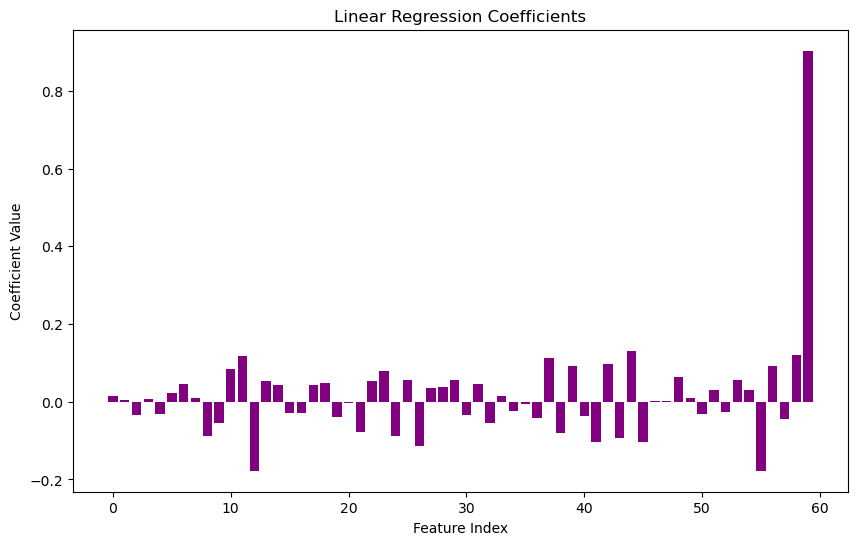

In [22]:
if coefficients.ndim > 1:  # If coefficients are multi-dimensional (e.g., for multi-output regression)
    coefficients = coefficients[0]

plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients, color='purple')
plt.title('Linear Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.show()

In [23]:
# Correlation between 'Close' and 'Volume'
correlation = data['Close'].corr(data['Volume'])
print(f"Correlation between 'Close' and 'Volume': {correlation}")

Correlation between 'Close' and 'Volume': -0.4133618746720191


# More Comparisons

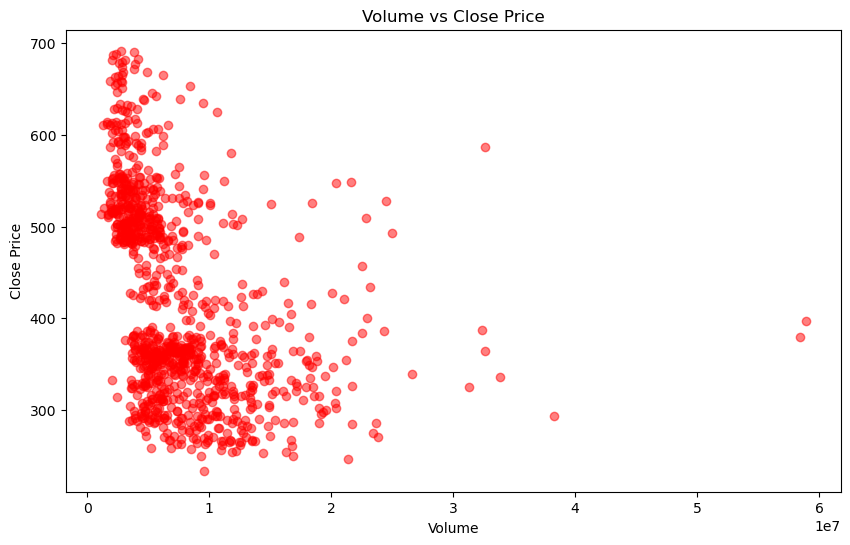

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Close'], alpha=0.5, color='red')
plt.title('Volume vs Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

# Recent Trends

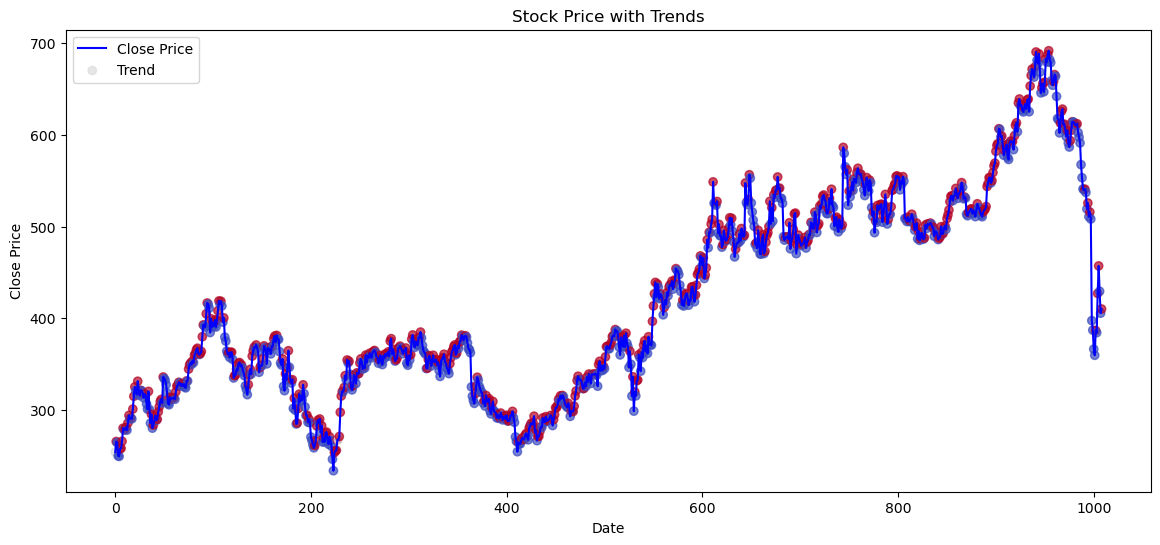

In [25]:
# Add trend classification
filtered_data['Trend'] = np.sign(filtered_data['Close'].diff()).fillna(0).astype(int)
plt.figure(figsize=(14, 6))
plt.plot(filtered_data['Close'], label='Close Price', color='blue')
plt.scatter(filtered_data.index, filtered_data['Close'], c=filtered_data['Trend'], cmap='coolwarm', label='Trend', alpha=0.7)
plt.title('Stock Price with Trends')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Residual Analysis

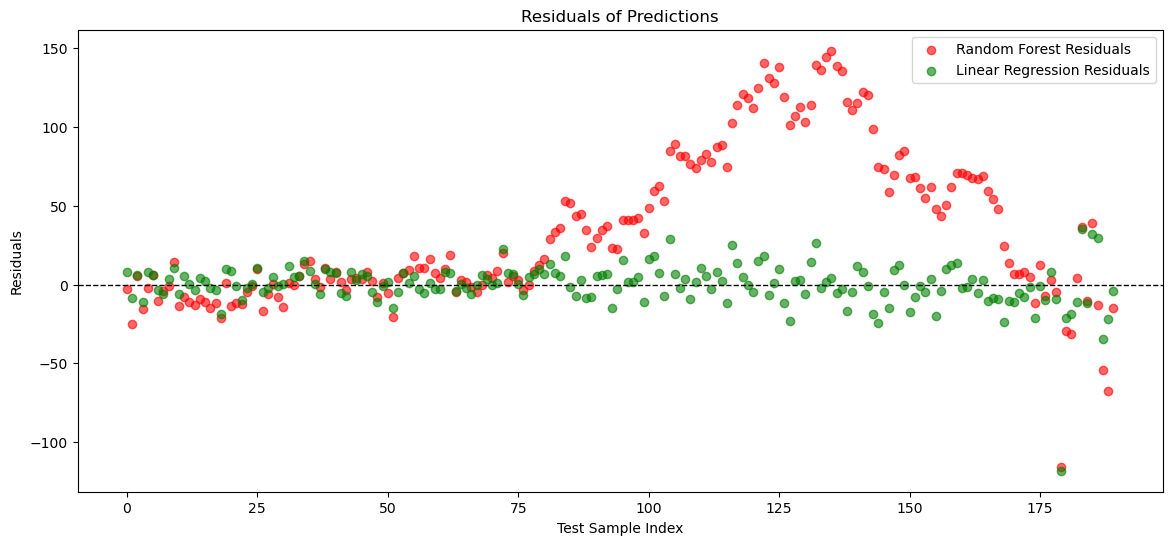

In [26]:
# Residual analysis
rf_residuals = y_test_actual - rf_predictions_actual
lr_residuals = y_test_actual - lr_predictions_actual

plt.figure(figsize=(14, 6))
plt.scatter(range(len(rf_residuals)), rf_residuals, label='Random Forest Residuals', color='red', alpha=0.6)
plt.scatter(range(len(lr_residuals)), lr_residuals, label='Linear Regression Residuals', color='green', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residuals of Predictions')
plt.xlabel('Test Sample Index')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# RandomForest Model

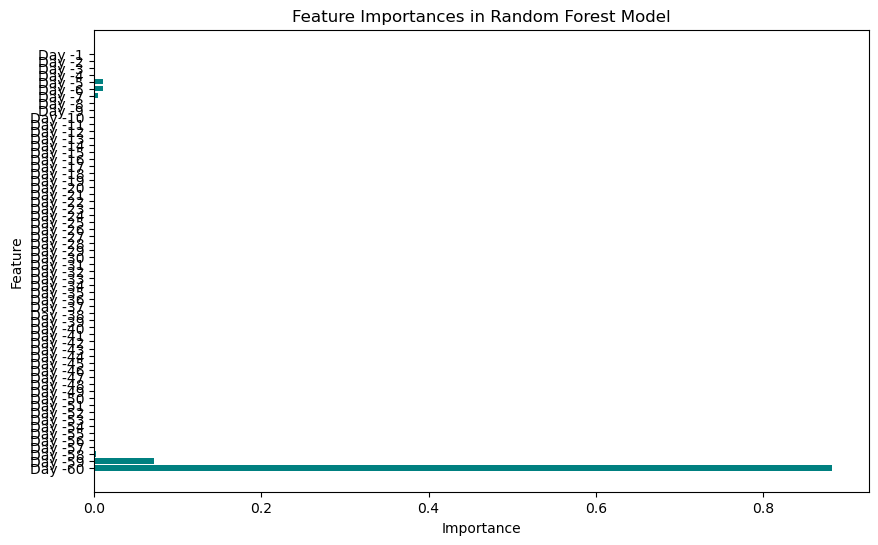

In [27]:
# Feature importance for RandomForest model
feature_importances = rf_model.feature_importances_
feature_labels = [f'Day -{i+1}' for i in range(X_train.shape[1])]

plt.figure(figsize=(10, 6))
plt.barh(feature_labels, feature_importances, color='teal')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# Final Output

=== Final Summary ===
Random Forest RMSE: 59.720251459737945
Linear Regression RMSE: 13.716819111622584
Correlation between 'Close' and 'Volume': -0.4133618746720191
Recommendation: Linear Regression model performs better for this dataset.


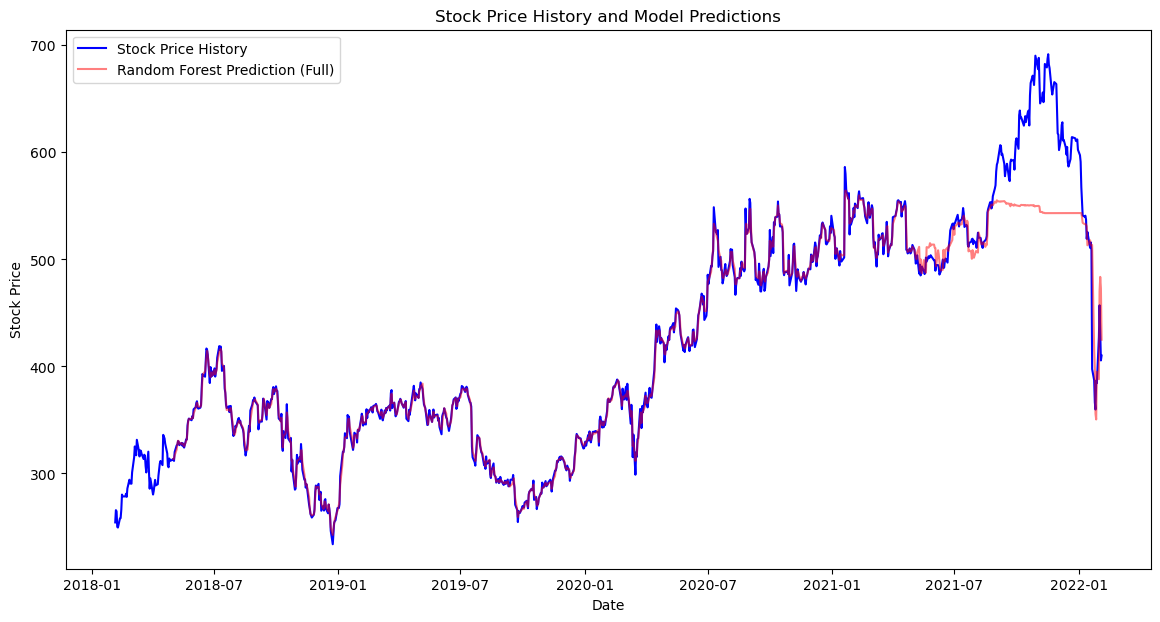

In [28]:
# Final Summary
print("=== Final Summary ===")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Correlation between 'Close' and 'Volume': {correlation}")
if rf_rmse < lr_rmse:
    print("Recommendation: Random Forest model performs better for this dataset.")
else:
    print("Recommendation: Linear Regression model performs better for this dataset.")

# Display key insights
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price History', color='blue')
plt.plot(stock_data['Date'][60:], scaler.inverse_transform(rf_model.predict(X).reshape(-1, 1)), label='Random Forest Prediction (Full)', color='red', alpha=0.5)
plt.title('Stock Price History and Model Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()